<a href="https://colab.research.google.com/github/Manasa-270/manasab2/blob/master/Mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("country_wise_latest.csv")
missing_values = df.isnull().sum()
missing_values[missing_values > 0]
selected_columns = ["Confirmed", "Deaths", "Recovered", "Active", "New cases",
                    "New deaths", "New recovered", "Deaths / 100 Cases", "Recovered / 100 Cases"]
df = df[selected_columns]
print(df.head())

   Confirmed  Deaths  Recovered  Active  New cases  New deaths  New recovered  \
0      36263    1269      25198    9796        106          10             18   
1       4880     144       2745    1991        117           6             63   
2      27973    1163      18837    7973        616           8            749   
3        907      52        803      52         10           0              0   
4        950      41        242     667         18           1              0   

   Deaths / 100 Cases  Recovered / 100 Cases  
0                3.50                  69.49  
1                2.95                  56.25  
2                4.16                  67.34  
3                5.73                  88.53  
4                4.32                  25.47  


Outliers flagged within original columns and saved to 'country_data_outliers_flagged.csv'


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("country_wise_latest.csv")  # Make sure the file is in the same directory

# Step 1: Check and display missing values (optional for inspection)
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values[missing_values > 0])

# Step 2: Keep only the required columns
selected_columns = [
    "Confirmed", "Deaths", "Recovered", "Active", "New cases",
    "New deaths", "New recovered", "Deaths / 100 Cases", "Recovered / 100 Cases"
]
df = df[selected_columns]

# Step 3: Function to replace outliers with a flag
def replace_with_flag(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series.apply(lambda x: f"OUTLIER ({x})" if x < lower or x > upper else x)

# Step 4: Apply outlier flagging
df['New cases'] = replace_with_flag(df['New cases'])
df['New deaths'] = replace_with_flag(df['New deaths'])
df['New recovered'] = replace_with_flag(df['New recovered'])

# Step 5: Save the updated dataframe to a new file
df.to_csv("country_data_outliers_flagged.csv", index=False)

print("Final dataset saved to 'country_data_outliers_flagged.csv'")

Missing values:
 Series([], dtype: int64)
Final dataset saved to 'country_data_outliers_flagged.csv'


In [ ]:
import pandas as pd

# Step 1: Load the dataset
df = pd.read_csv("country_wise_latest.csv")  # Make sure the file is in the same folder

# Step 2: Check and display missing values (optional)
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values[missing_values > 0])  # Shows only columns with NaNs

# Step 3: Keep only the required columns
selected_columns = [
    "Confirmed", "Deaths", "Recovered", "Active", "New cases",
    "New deaths", "New recovered", "Deaths / 100 Cases", "Recovered / 100 Cases"
]
df = df[selected_columns]

# Display the first few rows of the cleaned data
print("\nInitial cleaned data (before outlier flagging):")
print(df.head())

# Step 4: Define a function to replace outliers with a flag
def replace_with_flag(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series.apply(lambda x: f"OUTLIER ({x})" if x < lower or x > upper else x)

# Step 5: Apply the function to the relevant columns
df['New cases'] = replace_with_flag(df['New cases'])
df['New deaths'] = replace_with_flag(df['New deaths'])
df['New recovered'] = replace_with_flag(df['New recovered'])

# Step 6: Show a preview of the updated data
print("\nUpdated data with outliers flagged:")
print(df[['New cases', 'New deaths', 'New recovered']].head())

# Step 7: Save the final result to a new CSV file
df.to_csv("country_data_outliers_flagged.csv", index=False)
print("\n✅ Final dataset saved to 'country_data_outliers_flagged.csv'")


Missing values:
 Series([], dtype: int64)

Initial cleaned data (before outlier flagging):
   Confirmed  Deaths  Recovered  Active  New cases  New deaths  New recovered  \
0      36263    1269      25198    9796        106          10             18   
1       4880     144       2745    1991        117           6             63   
2      27973    1163      18837    7973        616           8            749   
3        907      52        803      52         10           0              0   
4        950      41        242     667         18           1              0   

   Deaths / 100 Cases  Recovered / 100 Cases  
0                3.50                  69.49  
1                2.95                  56.25  
2                4.16                  67.34  
3                5.73                  88.53  
4                4.32                  25.47  

Updated data with outliers flagged:
  New cases New deaths  New recovered
0       106         10             18
1       117          6     

In [ ]:
df.rename(columns={"WHO Region": "Region"}, inplace=True)

# Change 'Americas' to 'America'
df["Region"] = df["Region"].replace("Americas", "America")

KeyError: 'Region'

In [ ]:
import pandas as pd

# Step 1: Load the dataset
df = pd.read_csv("country_wise_latest.csv")

# Step 2: Check and display missing values (optional)
missing_values = df.isnull().sum()
print("🔍 Missing values found:\n", missing_values[missing_values > 0])

# Step 3: Select and keep only required columns
selected_columns = [
    "Country/Region", "Confirmed", "Deaths", "Recovered", "Active", "New cases",
    "New deaths", "New recovered", "Deaths / 100 Cases", "Recovered / 100 Cases"
]
# Add region if available
if "WHO Region" in df.columns:
    selected_columns.append("WHO Region")

df = df[selected_columns]

# Rename WHO Region to Region if exists
if "WHO Region" in df.columns:
    df.rename(columns={"WHO Region": "Region"}, inplace=True)

# Step 4: Feature Engineering – New Columns

# CFR
df["CFR (%)"] = (df["Deaths"] / df["Confirmed"].replace(0, 1)) * 100

# New Cases Growth Rate
df["New Cases Growth Rate (%)"] = (df["New cases"] / df["Confirmed"].replace(0, 1)) * 100

# Mortality Risk Score
df["Mortality Risk Score"] = df["CFR (%)"] + (df["Deaths"] / df["Active"].replace(0, 1)) * 10

# 🔍 Print formula explanations
print("\n📘 Formula Explanations for New Columns:")
print("1. CFR (%) = (Deaths / Confirmed) * 100")
print("   ➤ Indicates what percent of confirmed cases have resulted in death.")

print("2. New Cases Growth Rate (%) = (New cases / Confirmed) * 100")
print("   ➤ Measures how rapidly new cases are growing compared to total confirmed.")

print("3. Mortality Risk Score = CFR (%) + (Deaths / Active cases) * 10")
print("   ➤ A custom indicator to reflect overall severity combining fatality and active case death risk.")

# Step 5: Function to flag outliers using IQR
def replace_with_flag(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series.apply(lambda x: f"OUTLIER ({x})" if x < lower or x > upper else x)

# Step 6: Apply outlier detection to selected columns
df["New cases"] = replace_with_flag(df["New cases"])
df["New deaths"] = replace_with_flag(df["New deaths"])
df["New recovered"] = replace_with_flag(df["New recovered"])

# Step 7: Region-wise aggregation if Region column exists
if "Region" in df.columns:
    region_summary = df.groupby("Region")[["Confirmed", "Deaths", "Recovered", "Active"]].sum()
    region_summary["CFR (%)"] = (region_summary["Deaths"] / region_summary["Confirmed"].replace(0, 1)) * 100
    region_summary["Recovery Rate (%)"] = (region_summary["Recovered"] / region_summary["Confirmed"].replace(0, 1)) * 100

    print("\n📊 Region-wise Summary (Aggregated):")
    print(region_summary)

# Step 8: Save the final dataset
df.to_csv("country_data_outliers_flagged_extended.csv", index=False)
print("\n✅ Final enhanced dataset saved as 'country_data_outliers_flagged_extended.csv'")


🔍 Missing values found:
 Series([], dtype: int64)

📘 Formula Explanations for New Columns:
1. CFR (%) = (Deaths / Confirmed) * 100
   ➤ Indicates what percent of confirmed cases have resulted in death.
2. New Cases Growth Rate (%) = (New cases / Confirmed) * 100
   ➤ Measures how rapidly new cases are growing compared to total confirmed.
3. Mortality Risk Score = CFR (%) + (Deaths / Active cases) * 10
   ➤ A custom indicator to reflect overall severity combining fatality and active case death risk.

📊 Region-wise Summary (Aggregated):
                       Confirmed  Deaths  Recovered   Active   CFR (%)  \
Region                                                                   
Africa                    723207   12223     440645   270339  1.690111   
Americas                 8839286  342732    4468616  4027938  3.877372   
Eastern Mediterranean    1490744   38339    1201400   251005  2.571803   
Europe                   3299523  211144    1993723  1094656  6.399228   
South-East Asia

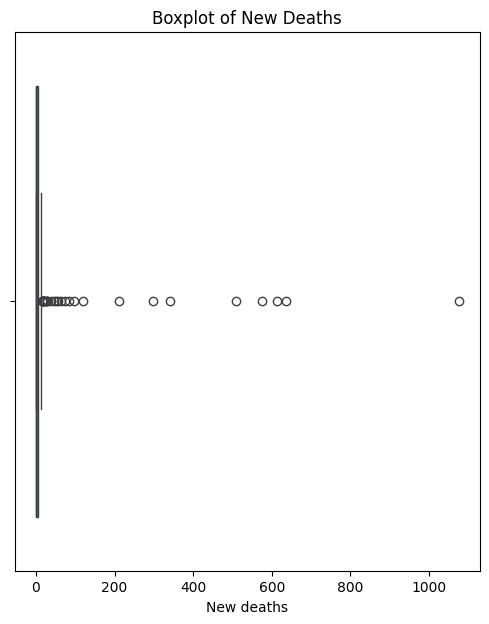

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("country_wise_latest.csv")
# Boxplot for detecting outliers visually
plt.figure(figsize=(6,7))
sns.boxplot(x=df["New deaths"])
plt.title("Boxplot of New Deaths")
plt.show()

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("country_wise_latest.csv")

# If the region column is named "WHO Region", rename it to "Region"
if "WHO Region" in df.columns:
    df.rename(columns={"WHO Region": "Region"}, inplace=True)

# Show unique values before replacement (optional)
print("Before replacement:\n", df["Region"].unique())

# Replace "Americas" with "America"
df["Region"] = df["Region"].replace("Americas", "America")

# Show unique values after replacement (optional)
print("\nAfter replacement:\n", df["Region"].unique())


Before replacement:
 ['Eastern Mediterranean' 'Europe' 'Africa' 'Americas' 'Western Pacific'
 'South-East Asia']

After replacement:
 ['Eastern Mediterranean' 'Europe' 'Africa' 'America' 'Western Pacific'
 'South-East Asia']


In [ ]:
# Replace "Americas" with "America"
import pandas as pd
df["Region"] = df["Region"].replace("Americas", "America")

# Save to CSV
df.to_csv("country_wise_latest.csv", index=False)  # Overwrites original file


NameError: name 'df' is not defined

In [ ]:
import pandas as pd

# Load the original dataset
df = pd.read_csv("country_wise_latest.csv")

# Define the columns you want to keep
selected_columns = [
    "Country/Region", "Confirmed", "Deaths", "Recovered", "Active", "New cases",
    "New deaths", "New recovered", "Deaths / 100 Cases", "Recovered / 100 Cases"
]

# Filter the DataFrame to keep only those columns
df = df[selected_columns]

# Overwrite the original CSV with only selected columns
df.to_csv("country_wise_latest.csv", index=False)

print("✅ Updated 'country_wise_latest.csv' with only selected columns.")


✅ Updated 'country_wise_latest.csv' with only selected columns.


In [ ]:
import pandas as pd

# Use df = pd.read_csv("country_wise_latest.csv") to load the original dataset.

# Specify which columns you wish to retain: selected_columns = [ "Country/Region", "Confirmed", "Deaths", "Recovered", "Active", "New cases", "New deaths", "New recovered", "Deaths / 100 Cases", "Recovered / 100 Cases"]

# To retain only those columns, filter the DataFrame.
df = df[selected_columns]

# Use df.to_csv("country_wise_latest.csv", index=False) to overwrite the original CSV with just the chosen columns.

print("✅ Only selected columns were added to 'country_wise_latest.csv'.")



📊 Statistics for Confirmed:
Mean: 88130.94
Median: 5059.00
Mode: [   24    86 10621]

📊 Statistics for Deaths:
Mean: 3497.52
Median: 108.00
Mode: [0]

📊 Statistics for Recovered:
Mean: 50631.48
Median: 2815.00
Mode: [0]

📊 Statistics for Active:
Mean: 34001.94
Median: 1600.00
Mode: [0]

📊 Statistics for New cases:
Mean: 1222.96
Median: 49.00
Mode: [0]

📊 Statistics for New deaths:
Mean: 28.96
Median: 1.00
Mode: [0]

📊 Statistics for New recovered:
Mean: 933.81
Median: 22.00
Mode: [0]


In [ ]:
import pandas as pd

# Load cleaned dataset
df = pd.read_csv("country_data_outliers_flagged_extended.csv")

# Convert 'New cases' etc. back to numbers if needed
for col in ['New cases', 'New deaths', 'New recovered']:
    df[col] = pd.to_numeric(df[col].replace(to_replace=r'OUTLIER \((.*?)\)', value=r'\1', regex=True), errors='coerce')

# Descriptive stats for 'Confirmed' as a sales proxy
print("📊 Descriptive Statistics for Confirmed Cases (used as Sales):")
print(f"Mean: {df['Confirmed'].mean():.2f}")
print(f"Median: {df['Confirmed'].median():.2f}")
print(f"Standard Deviation: {df['Confirmed'].std():.2f}")

📊 Descriptive Statistics for Confirmed Cases (used as Sales):
Mean: 88130.94
Median: 5059.00
Standard Deviation: 383318.66


In [ ]:
from scipy.stats import zscore

# Calculate Z-score for 'Confirmed' (used as sales)
df['Confirmed_ZScore'] = zscore(df['Confirmed'])

# Flag extreme values
df['Outlier_Flag'] = df['Confirmed_ZScore'].apply(lambda z: 'High' if z > 2 else ('Low' if z < -2 else 'Normal'))

print("\n📍 Z-Score based flags:")
print(df[['Country/Region', 'Confirmed', 'Confirmed_ZScore', 'Outlier_Flag']].head())


📍 Z-Score based flags:
  Country/Region  Confirmed  Confirmed_ZScore Outlier_Flag
0    Afghanistan      36263         -0.135676       Normal
1        Albania       4880         -0.217768       Normal
2        Algeria      27973         -0.157361       Normal
3        Andorra        907         -0.228160       Normal
4         Angola        950         -0.228048       Normal


In [2]:
# Define high-value as top 25%, low-value as bottom 25%
q75 = df['Confirmed'].quantile(0.75)
q25 = df['Confirmed'].quantile(0.25)

def categorize(value):
    if value >= q75:
        return "High-Value"
    elif value <= q25:
        return "Low-Value"
    else:
        return "Mid-Value"

df['Customer_Segment'] = df['Confirmed'].apply(categorize)

print("\nPatients based on Confirmed:")
print(df[['Country/Region', 'Confirmed', 'Customer_Segment']].head())

NameError: name 'df' is not defined

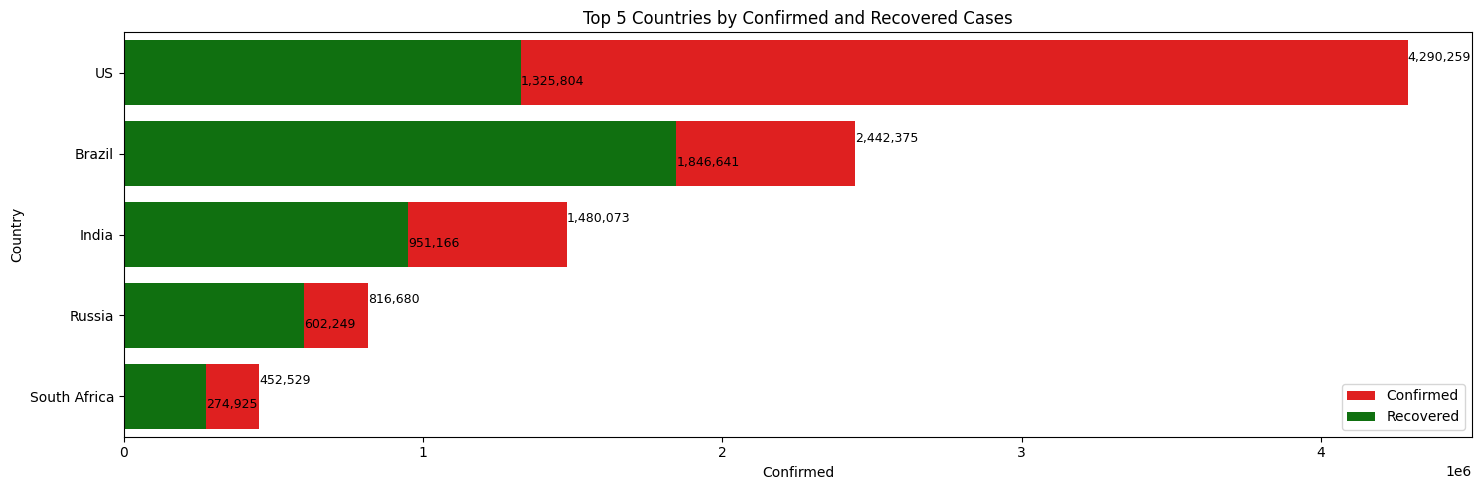

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv("country_data_outliers_flagged_extended.csv")

# Rename column if needed for consistency
df = df.rename(columns={"Country/Region": "Country"})

# Sort to get top 5 countries by confirmed cases
top_5 = df.sort_values(by='Confirmed', ascending=False).head()

# Plot
plt.figure(figsize=(15, 5))
confirmed = sns.barplot(x='Confirmed', y='Country', data=top_5, color='red', label='Confirmed')
recovered = sns.barplot(x='Recovered', y='Country', data=top_5, color='green', label='Recovered')

# Add value labels
for i, (value, name) in enumerate(zip(top_5['Confirmed'], top_5['Country'])):
    confirmed.text(value, i - 0.15, f'{value:,.0f}', size=9)
for i, (value, name) in enumerate(zip(top_5['Recovered'], top_5['Country'])):
    recovered.text(value, i + 0.15, f'{value:,.0f}', size=9)

plt.legend(loc='lower right')
plt.title("Top 5 Countries by Confirmed and Recovered Cases")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error  # Correct import statement

# Load the data (make any necessary file path adjustments).
df = pd.read_csv('country_wise_latest.csv')

# Remove rows in 'Recovered' or 'New recovered' that contain missing values.
df_clean = df.dropna(subset=['Recovered', 'New recovered'])

# Actual and anticipated values
actual = df_clean['Recovered']
anticipated = df_clean['New recovered']

# Calculate the MAE (Mean Absolute Error)
mae = mean_absolute_error(actual, anticipated)

# Determine the MAE by using the formula
print("Mean Absolute Error (MAE):", mae)



Mean Absolute Error (MAE): 49697.66844919786
